In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/EPL_Set.csv")
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Div,9664,1,E0,9664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,9664,2572,1/1/1994,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomeTeam,9664,50,Arsenal,479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AwayTeam,9664,50,Man United,479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FTHG,9664.0,NaN,NaN,NaN,1.523903,1.301671,0.0,1.0,1.0,2.0,9.0
FTAG,9664.0,NaN,NaN,NaN,1.121482,1.121667,0.0,0.0,1.0,2.0,8.0
FTR,9664,3,H,4461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTHG,8740.0,NaN,NaN,NaN,0.685469,0.833581,0.0,0.0,0.0,1.0,5.0
HTAG,8740.0,NaN,NaN,NaN,0.488444,0.710524,0.0,0.0,0.0,1.0,5.0
HTR,8740,3,D,3679,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
Div,0
Date,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
FTR,0
HTHG,924
HTAG,924
HTR,924


In [15]:
df.dtypes

Div          object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
Season       object
dtype: object

In [16]:
for i in ['HTHG','HTAG']:
    df[i] = df[i].fillna(df[i].median())

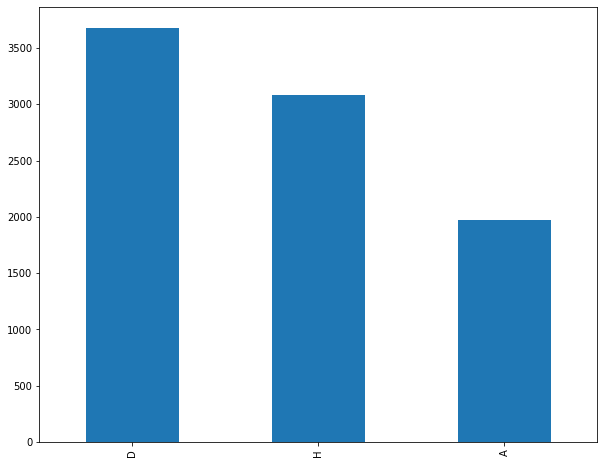

In [17]:
plt.figure(figsize=(10,8))
df['HTR'].value_counts().plot.bar()

In [18]:
df['HTR'].mode()

0    D
dtype: object

In [20]:
df['HTR'].fillna('D', inplace=True)
df.isna().sum().to_frame('Count of Null values')

,Count of Null values
Div,0
Date,0
HomeTeam,0
AwayTeam,0
FTHG,0
FTAG,0
FTR,0
HTHG,0
HTAG,0
HTR,0


In [5]:
df.agg({'Season': ['min', 'max']})


,Season
min,1993-94
max,2017-18


In [6]:
df['HomeTeam'].nunique()


50

In [7]:
df['AwayTeam'].nunique()

50

Text(0, 0.5, 'Count')

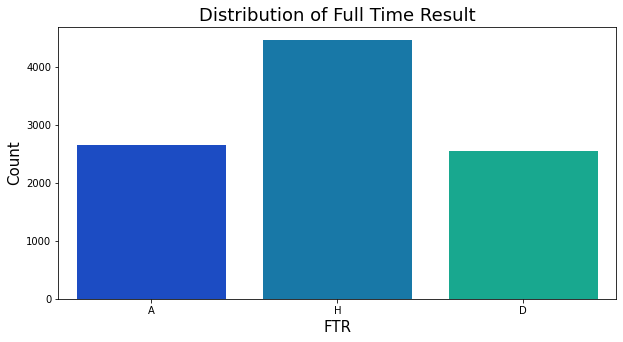

In [8]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data=df,x="FTR",palette="winter")
plt.title("Distribution of Full Time Result",size=18)
plt.xlabel("FTR",size=15)
plt.ylabel("Count",size=15)

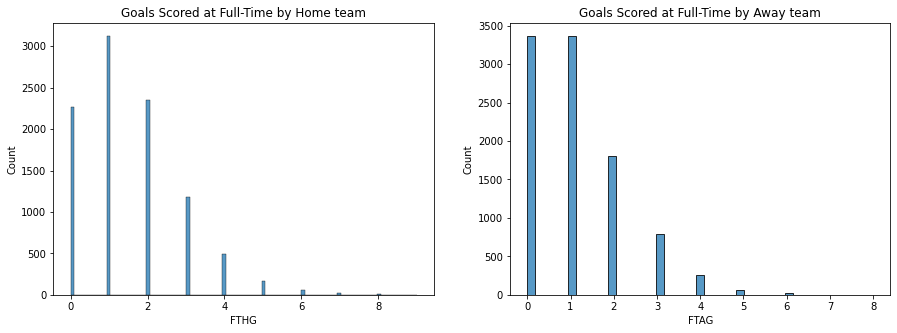

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(df, x="FTHG")
plt.title("Goals Scored at Full-Time by Home team")
plt.subplot(1, 2, 2)
sns.histplot(df, x="FTAG")
plt.title("Goals Scored at Full-Time by Away team")
plt.show()

In [10]:
tp=df.nlargest(10,'FTHG')
tp=toph.reset_index()
tp.loc[:,['Season','HomeTeam','FTR','HTR','FTHG','HTHG']]

,Season,HomeTeam,FTR,HTR,FTHG,HTHG
0,1994-95,Man United,H,NaN,9,NaN
1,2009-10,Tottenham,H,H,9,1.0
2,1999-00,Newcastle,H,H,8,4.0
3,2007-08,Middlesbrough,H,H,8,2.0
4,2009-10,Chelsea,H,H,8,2.0
5,2011-12,Man United,H,H,8,3.0
6,2012-13,Chelsea,H,H,8,3.0
7,2014-15,Southampton,H,H,8,3.0
8,1993-94,Newcastle,H,NaN,7,NaN
9,1994-95,Aston Villa,H,NaN,7,NaN


In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
teams=df[df['Season']>='2005-06']['HomeTeam'].unique()
teams

array(['Aston Villa', 'Everton', 'Fulham', 'Man City', 'Middlesbrough',
       'Portsmouth', 'Sunderland', 'West Ham', 'Arsenal', 'Wigan',
       'Birmingham', 'Blackburn', 'Charlton', 'Liverpool', 'Man United',
       'Newcastle', 'Tottenham', 'West Brom', 'Bolton', 'Chelsea',
       'Reading', 'Sheffield United', 'Watford', 'Derby', 'Hull', 'Stoke',
       'Wolves', 'Burnley', 'Blackpool', 'QPR', 'Swansea', 'Norwich',
       'Southampton', 'Crystal Palace', 'Cardiff', 'Leicester',
       'Bournemouth', 'Brighton', 'Huddersfield'], dtype=object)

In [32]:
df1=pd.DataFrame()
df1=df[(df.HomeTeam.isin(teams)) & (df.AwayTeam.isin(teams))]

In [35]:
df1.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Season'],
      dtype='object')

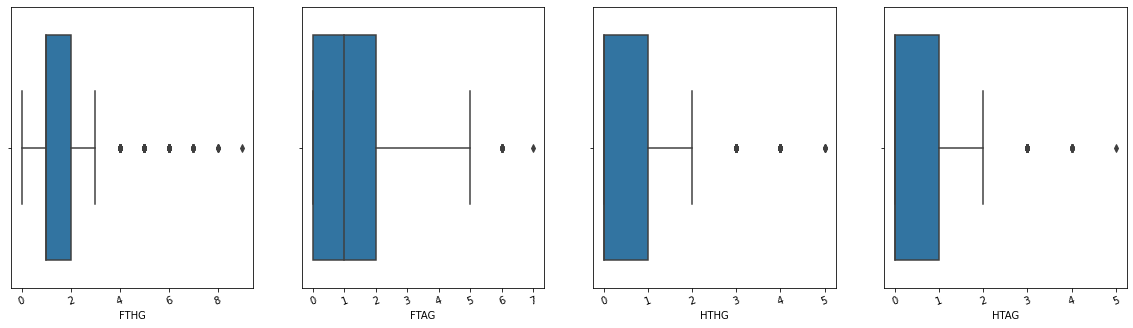

In [38]:
plt.figure(figsize=(20,30))
features = ['FTHG', 'FTAG', 'HTHG', 'HTAG']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(df1[i[1]])
    plt.xticks(rotation = 20)

In [39]:
for i in ['FTHG', 'FTAG', 'HTHG', 'HTAG']:
    Q1=df1[i].quantile(0.25)  
    Q3=df1[i].quantile(0.75)    
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR    
    for j in df1[i]:    
       if j > up_limit or j < low_limit:     
            df1[i] = df1[i].replace(j, np.median(df1[i])) 

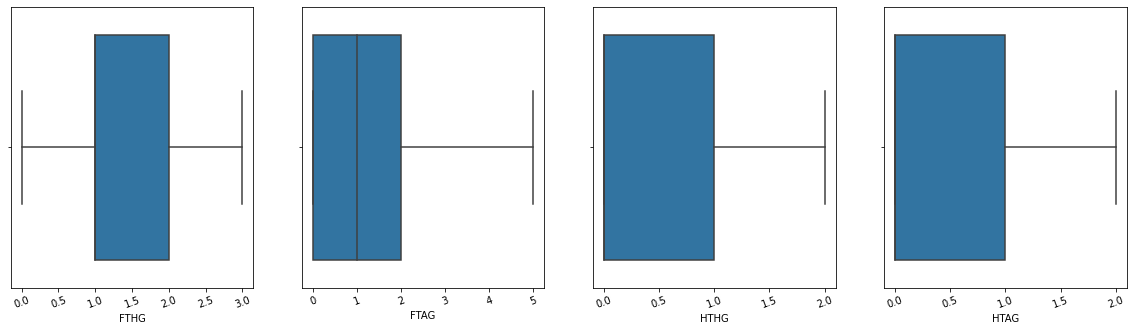

In [40]:
plt.figure(figsize=(20,30))
features = ['FTHG', 'FTAG', 'HTHG', 'HTAG']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(df1[i[1]])
    plt.xticks(rotation = 20)

In [48]:
df2 = []
for i in list(df.columns):
    if df1[i].dtype == 'O' and len(df1[i].unique()) > 2:
        df2.append(i)

In [49]:
     print(df2)

['Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HTR', 'Season']


In [50]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in df2:
    df1[i] = labelencoder.fit_transform(df1[i])

In [56]:
y = df1['FTR']
X = df1.drop(['Season', 'FTHG', 'FTAG', 'HTHG', 'HTAG', 'FTR'], axis=1)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
start_time = time.time()
logreg.fit(X_train, y_train)
end_time = time.time()
print('Training Time:', round(end_time-start_time,2))